<a href="https://www.kaggle.com/code/hediehmr/raptor-the-multi-agent-phd-hunter?scriptVersionId=285132613" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🦖 RAPTOR: The Multi-Agent PhD Hunter
**An intelligent, resumable agentic system for automating academic applications.**

This project demonstrates:
1. **Multi-agent Orchestration** (Initializer, Analyst, Drafter, Executor)
2. **Human-in-the-Loop** (Review & Approval)
3. **Stateful Memory** (Session handling)

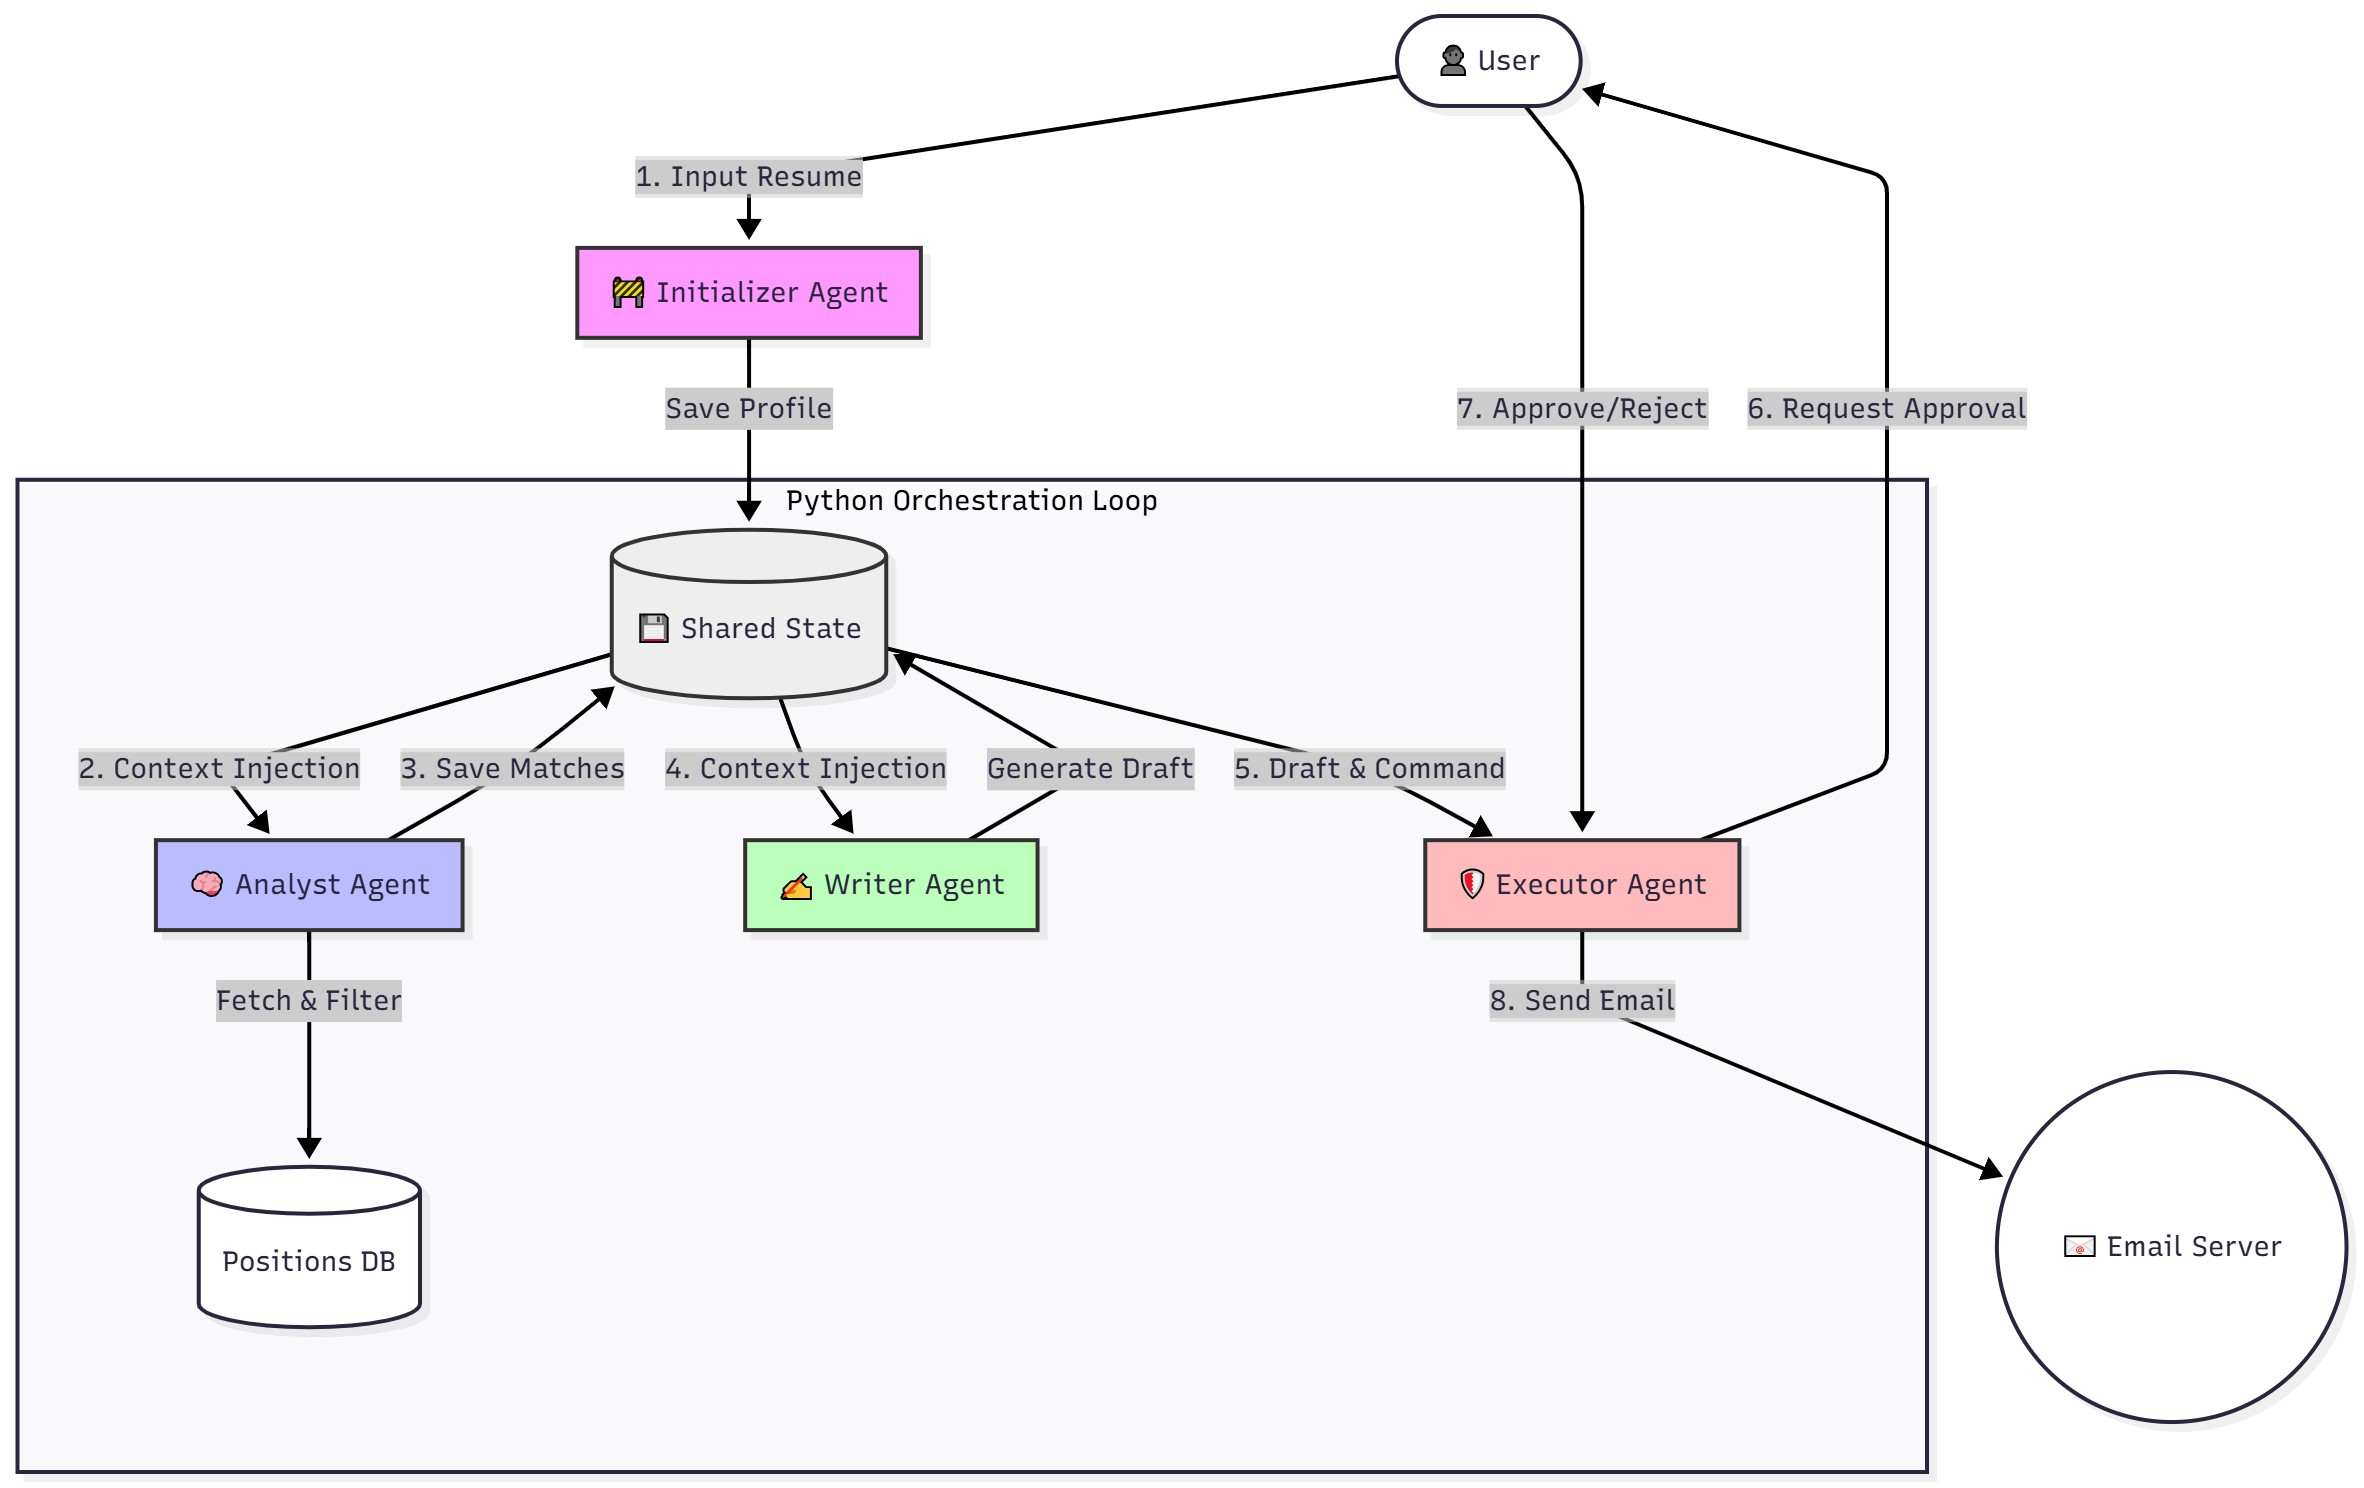

In [7]:
pip install google-adk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 8.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
  Attempting uninstall: cachetools
    Found existing installation: cachetools 6.2.1
    Uninstalling cachetools-6.2.1:
      Successfully uninstalled cachetools-6.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.29.5 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14

In [213]:
import uuid
from google.genai import types

from google.adk.agents import LlmAgent
from google.adk.models.google_llm import Gemini
from google.adk.sessions import InMemorySessionService

from google.adk.tools.mcp_tool.mcp_toolset import McpToolset
from google.adk.tools.tool_context import ToolContext
from google.adk.tools.mcp_tool.mcp_session_manager import StdioConnectionParams
from mcp import StdioServerParameters

from google.adk.apps.app import App, ResumabilityConfig
from google.adk.tools.function_tool import FunctionTool
from google.adk.runners import InMemoryRunner, Runner
print("✅ ADK components imported successfully.")

✅ ADK components imported successfully.


In [22]:
import json
class PositionDatabase:
    def __init__(self, source_type="mock"):
        self.source_type = source_type

    def load_positions(self):
        if self.source_type == "mock":
            raw_json_data = """ [
  {
    "id": 1,
    "title": "PhD in Efficient Machine Learning",
    "description": "Developing sparse neural networks and quantization techniques for edge devices. Requires strong C++ and CUDA skills.",
    "requirements": {
      "minimum_gre_score": 325,
      "minimum_gpa": 3.8,
      "deadline": "2025-12-15"
    },
    "university": {
      "name": "Massachusetts Institute of Technology (MIT)",
      "location": "Cambridge, USA",
      "ranking": 1
    },
    "professor": {
      "name": "Dr. Song Han",
      "email": "songhan@mit.edu",
      "research_interests": ["Efficient AI", "Hardware-Aware NAS"]
    },
    "apply_cost": {
      "currency": "USD",
      "amount": 75
    }
  },
  {
    "id": 2,
    "title": "PhD in Neuromorphic Computing",
    "description": "Research on spiking neural networks and brain-inspired hardware architectures.",
    "requirements": {
      "minimum_gre_score": 310,
      "minimum_gpa": 3.5,
      "deadline": "2025-01-31"
    },
    "university": {
      "name": "Technical University of Munich (TUM)",
      "location": "Munich, Germany",
      "ranking": 28
    },
    "professor": {
      "name": "Dr. Alois Knoll",
      "email": "knoll@in.tum.de",
      "research_interests": ["Robotics", "Neuromorphic Systems"]
    },
    "apply_cost": {
      "currency": "EUR",
      "amount": 0
    }
  },
  {
    "id": 3,
    "title": "PhD in Reinforcement Learning",
    "description": "Focus on offline RL and safety in autonomous driving agents.",
    "requirements": {
      "minimum_gre_score": 320,
      "minimum_gpa": 3.7,
      "deadline": "2025-01-10"
    },
    "university": {
      "name": "University of Toronto",
      "location": "Toronto, Canada",
      "ranking": 21
    },
    "professor": {
      "name": "Dr. Sheila McIlraith",
      "email": "sheila@cs.toronto.edu",
      "research_interests": ["KR", "Reinforcement Learning"]
    },
    "apply_cost": {
      "currency": "CAD",
      "amount": 125
    }
  },
  {
    "id": 4,
    "title": "PhD in Computer Vision",
    "description": "3D scene reconstruction and nerf fields for AR/VR applications.",
    "requirements": {
      "minimum_gre_score": 315,
      "minimum_gpa": 3.3,
      "deadline": "2025-03-01"
    },
    "university": {
      "name": "ETH Zurich",
      "location": "Zurich, Switzerland",
      "ranking": 7
    },
    "professor": {
      "name": "Dr. Marc Pollefeys",
      "email": "marc.pollefeys@inf.ethz.ch",
      "research_interests": ["Computer Vision", "3D Reconstruction"]
    },
    "apply_cost": {
      "currency": "CHF",
      "amount": 0
    }
  },
  {
    "id": 5,
    "title": "PhD in NLP & Large Language Models",
    "description": "Researching reasoning capabilities and hallucination reduction in LLMs.",
    "requirements": {
      "minimum_gre_score": 328,
      "minimum_gpa": 3.9,
      "deadline": "2024-12-01"
    },
    "university": {
      "name": "Stanford University",
      "location": "California, USA",
      "ranking": 2
    },
    "professor": {
      "name": "Dr. Christopher Manning",
      "email": "manning@stanford.edu",
      "research_interests": ["NLP", "Deep Learning"]
    },
    "apply_cost": {
      "currency": "USD",
      "amount": 125
    }
  },
  {
    "id": 6,
    "title": "PhD in AI for Healthcare",
    "description": "Using federated learning for privacy-preserving medical data analysis.",
    "requirements": {
      "minimum_gre_score": 300,
      "minimum_gpa": 3.2,
      "deadline": "2025-04-15"
    },
    "university": {
      "name": "University of Alberta",
      "location": "Edmonton, Canada",
      "ranking": 110
    },
    "professor": {
      "name": "Dr. Osmar Zaiane",
      "email": "zaiane@ualberta.ca",
      "research_interests": ["Data Mining", "Health Informatics"]
    },
    "apply_cost": {
      "currency": "CAD",
      "amount": 100
    }
  },
  {
    "id": 7,
    "title": "PhD in Robotics Systems",
    "description": "Design of soft robotics and control systems for human-robot interaction.",
    "requirements": {
      "minimum_gre_score": 310,
      "minimum_gpa": 3.4,
      "deadline": "2025-02-28"
    },
    "university": {
      "name": "Delft University of Technology",
      "location": "Delft, Netherlands",
      "ranking": 48
    },
    "professor": {
      "name": "Dr. Jens Kober",
      "email": "j.kober@tudelft.nl",
      "research_interests": ["Robotics", "Machine Learning"]
    },
    "apply_cost": {
      "currency": "EUR",
      "amount": 0
    }
  },
  {
    "id": 8,
    "title": "PhD in Distributed Systems",
    "description": "Scalable consensus algorithms for blockchain and distributed ledgers.",
    "requirements": {
      "minimum_gre_score": 318,
      "minimum_gpa": 3.6,
      "deadline": "2025-01-20"
    },
    "university": {
      "name": "EPFL",
      "location": "Lausanne, Switzerland",
      "ranking": 16
    },
    "professor": {
      "name": "Dr. Rachid Guerraoui",
      "email": "rachid.guerraoui@epfl.ch",
      "research_interests": ["Distributed Computing", "Algorithms"]
    },
    "apply_cost": {
      "currency": "CHF",
      "amount": 50
    }
  },
  {
    "id": 9,
    "title": "PhD in AI Safety and Alignment",
    "description": "Ensuring AI systems align with human values and robust decision making.",
    "requirements": {
      "minimum_gre_score": 325,
      "minimum_gpa": 3.8,
      "deadline": "2024-12-15"
    },
    "university": {
      "name": "University of Oxford",
      "location": "Oxford, UK",
      "ranking": 4
    },
    "professor": {
      "name": "Dr. Yarin Gal",
      "email": "yarin.gal@cs.ox.ac.uk",
      "research_interests": ["Bayesian Deep Learning", "AI Safety"]
    },
    "apply_cost": {
      "currency": "GBP",
      "amount": 75
    }
  },
  {
    "id": 10,
    "title": "PhD in Graph Neural Networks",
    "description": "Applying GNNs to molecular discovery and drug design.",
    "requirements": {
      "minimum_gre_score": 305,
      "minimum_gpa": 3.1,
      "deadline": "2025-05-30"
    },
    "university": {
      "name": "Mila - Quebec AI Institute",
      "location": "Montreal, Canada",
      "ranking": 30
    },
    "professor": {
      "name": "Dr. Jian Tang",
      "email": "jian.tang@hec.ca",
      "research_interests": ["Graph Learning", "Drug Discovery"]
    },
    "apply_cost": {
      "currency": "CAD",
      "amount": 115
    }
  },
  {
    "id": 11,
    "title": "PhD in Cloud Computing",
    "description": "Serverless computing optimization and resource scheduling in cloud environments.",
    "requirements": {
      "minimum_gre_score": 312,
      "minimum_gpa": 3.3,
      "deadline": "2025-02-15"
    },
    "university": {
      "name": "University of Melbourne",
      "location": "Melbourne, Australia",
      "ranking": 34
    },
    "professor": {
      "name": "Dr. Rajkumar Buyya",
      "email": "rbuyya@unimelb.edu.au",
      "research_interests": ["Cloud Computing", "IoT"]
    },
    "apply_cost": {
      "currency": "AUD",
      "amount": 100
    }
  },
  {
    "id": 12,
    "title": "PhD in Explainable AI (XAI)",
    "description": "Developing methods to interpret deep learning models for financial applications.",
    "requirements": {
      "minimum_gre_score": 308,
      "minimum_gpa": 3.5,
      "deadline": "2025-03-20"
    },
    "university": {
      "name": "National University of Singapore (NUS)",
      "location": "Singapore",
      "ranking": 8
    },
    "professor": {
      "name": "Dr. Reza Shokri",
      "email": "reza@comp.nus.edu.sg",
      "research_interests": ["Data Privacy", "Trustworthy ML"]
    },
    "apply_cost": {
      "currency": "SGD",
      "amount": 50
    }
  },
  {
    "id": 13,
    "title": "PhD in Computer Architecture",
    "description": "Designing next-generation accelerators for sparse tensor operations.",
    "requirements": {
      "minimum_gre_score": 320,
      "minimum_gpa": 3.7,
      "deadline": "2024-12-01"
    },
    "university": {
      "name": "Georgia Tech",
      "location": "Atlanta, USA",
      "ranking": 38
    },
    "professor": {
      "name": "Dr. Tushar Krishna",
      "email": "tushar@ece.gatech.edu",
      "research_interests": ["NoC", "AI Accelerators"]
    },
    "apply_cost": {
      "currency": "USD",
      "amount": 85
    }
  },
  {
    "id": 14,
    "title": "PhD in Cybersecurity & Crypto",
    "description": "Post-quantum cryptography and secure multi-party computation.",
    "requirements": {
      "minimum_gre_score": 316,
      "minimum_gpa": 3.4,
      "deadline": "2025-01-15"
    },
    "university": {
      "name": "Ruhr University Bochum",
      "location": "Bochum, Germany",
      "ranking": 200
    },
    "professor": {
      "name": "Dr. Eike Kiltz",
      "email": "eike.kiltz@rub.de",
      "research_interests": ["Cryptography", "Security"]
    },
    "apply_cost": {
      "currency": "EUR",
      "amount": 0
    }
  },
  {
    "id": 15,
    "title": "PhD in Human-Computer Interaction",
    "description": "Augmented reality interfaces for remote collaboration.",
    "requirements": {
      "minimum_gre_score": 305,
      "minimum_gpa": 3.2,
      "deadline": "2025-02-10"
    },
    "university": {
      "name": "University of British Columbia",
      "location": "Vancouver, Canada",
      "ranking": 34
    },
    "professor": {
      "name": "Dr. Karon MacLean",
      "email": "macLean@cs.ubc.ca",
      "research_interests": ["HCI", "Haptics"]
    },
    "apply_cost": {
      "currency": "CAD",
      "amount": 110
    }
  },
  {
    "id": 16,
    "title": "PhD in Databases",
    "description": "Optimizing database engines for non-volatile memory (NVM).",
    "requirements": {
      "minimum_gre_score": 315,
      "minimum_gpa": 3.5,
      "deadline": "2025-01-05"
    },
    "university": {
      "name": "Carnegie Mellon University",
      "location": "Pittsburgh, USA",
      "ranking": 25
    },
    "professor": {
      "name": "Dr. Andy Pavlo",
      "email": "pavlo@cs.cmu.edu",
      "research_interests": ["Database Systems", "Self-Driving DBMS"]
    },
    "apply_cost": {
      "currency": "USD",
      "amount": 100
    }
  },
  {
    "id": 17,
    "title": "PhD in Software Engineering",
    "description": "Automated bug fixing and code generation using LLMs.",
    "requirements": {
      "minimum_gre_score": 300,
      "minimum_gpa": 3.1,
      "deadline": "2025-03-30"
    },
    "university": {
      "name": "KTH Royal Institute of Technology",
      "location": "Stockholm, Sweden",
      "ranking": 89
    },
    "professor": {
      "name": "Dr. Martin Monperrus",
      "email": "monperrus@kth.se",
      "research_interests": ["Software Repair", "DevOps"]
    },
    "apply_cost": {
      "currency": "SEK",
      "amount": 900
    }
  },
  {
    "id": 18,
    "title": "PhD in Quantum Computing",
    "description": "Quantum error correction and quantum algorithms for optimization.",
    "requirements": {
      "minimum_gre_score": 320,
      "minimum_gpa": 3.6,
      "deadline": "2025-02-01"
    },
    "university": {
      "name": "University of Waterloo",
      "location": "Waterloo, Canada",
      "ranking": 112
    },
    "professor": {
      "name": "Dr. Raymond Laflamme",
      "email": "laflamme@iqc.ca",
      "research_interests": ["Quantum Information", "Physics"]
    },
    "apply_cost": {
      "currency": "CAD",
      "amount": 125
    }
  },
  {
    "id": 19,
    "title": "PhD in Mobile Computing",
    "description": "Battery-efficient sensing for wearable health devices.",
    "requirements": {
      "minimum_gre_score": 308,
      "minimum_gpa": 3.3,
      "deadline": "2025-04-10"
    },
    "university": {
      "name": "Dartmouth College",
      "location": "Hanover, USA",
      "ranking": 200
    },
    "professor": {
      "name": "Dr. Andrew Campbell",
      "email": "campbell@cs.dartmouth.edu",
      "research_interests": ["Mobile Sensing", "Health Tech"]
    },
    "apply_cost": {
      "currency": "USD",
      "amount": 80
    }
  },
  {
    "id": 20,
    "title": "PhD in Computational Neuroscience",
    "description": "Modeling visual cortex using deep neural networks.",
    "requirements": {
      "minimum_gre_score": 318,
      "minimum_gpa": 3.7,
      "deadline": "2025-01-25"
    },
    "university": {
      "name": "Tubingen University",
      "location": "Tubingen, Germany",
      "ranking": 78
    },
    "professor": {
      "name": "Dr. Matthias Bethge",
      "email": "matthias.bethge@uni-tuebingen.de",
      "research_interests": ["Computational Neuroscience", "Machine Learning"]
    },
    "apply_cost": {
      "currency": "EUR",
      "amount": 0
    }
  }
]"""
            return json.loads(raw_json_data)
        
        elif self.source_type == "production":
            # return database.connect("postgres://...").query(...)
            pass


# ==============================================================================
# 2. TOOL: Market Data Fetcher
# ==============================================================================
def fetch_positions_tool() -> str:
    """
    Fetches the list of open academic positions from the database.
    Returns: A JSON string of available positions.
    """
    db = PositionDatabase(source_type="mock")
    positions = db.load_positions()
    print(f"✅ Database Loaded: {len(positions)} positions.")
    return json.dumps(positions)

In [214]:
from dataclasses import dataclass, field
from typing import Dict, Any, Optional

@dataclass
class UserMemory:
    resume_text: Optional[str] = None
    constraints: Dict[str, Any] = field(default_factory=lambda: {
        "budget": 0, 
        "nationality": "Unknown"
    })

In [215]:
# Global instance to hold the data
user_state = UserMemory()
# ==============================================================================
# 2. TOOL: Profile Loader (Fixed Type Hints)
# ==============================================================================
def profile_loader_tool(
    resume_text: Optional[str] = None,  
    budget: Optional[int] = None,     
    nationality: Optional[str] = None 
) -> str:
    """
    Saves user profile data into memory. Acts as a guardrail.
    """
    global user_state

    # WRITE: Save data if provided
    if resume_text:
        user_state.resume_text = resume_text
        print(f"DEBUG: Resume saved (Length: {len(resume_text)})")
    
    if budget is not None:
        user_state.constraints["budget"] = budget
        print(f"DEBUG: Budget set to {budget}")

    if nationality:
        user_state.constraints["nationality"] = nationality
        print(f"DEBUG: Nationality set to {nationality}")

    # CHECK: Logic to verify if we can proceed
    if user_state.resume_text:
        return "PROCEED: Profile is ready. You can move to the next step."
    
    # If missing, we stop the agent and force it to ask the user.
    return "STOP: Resume Missing. Ask the user to provide their resume."

In [216]:
initializer_agent = LlmAgent(
    name="Initializer",
    model=Gemini(model="gemini-2.5-flash-lite"),
    instruction="""
    You are the Profile Manager Agent.
    
    PROTOCOL:
    1. ALWAYS call 'profile_loader_tool' immediately with any information the user provided.
    2. Check the tool output:
       - IF "STOP": Politely ask the user to upload their resume text.
       - IF "PROCEED": Respond EXACTLY with "INITIALIZATION_COMPLETE". Do not add anything else.
    """,
    tools=[FunctionTool(profile_loader_tool)]
)

In [217]:
analyst_agent = LlmAgent(
    name="Analyst",
    model=Gemini(model="gemini-2.5-flash-lite"),
    instruction="""
    You are the Job Analyst.
    
    PROTOCOL:
    1. Call 'fetch_positions_tool'.
    2. Filter jobs based on User Context provided in prompt.
       - Reject if cost > budget.
    3. Output the top valid matches as a JSON list. 
       Do not output any conversational text, JUST the JSON.
    """,
    tools=[FunctionTool(fetch_positions_tool)]
)

In [218]:
writer_agent = LlmAgent(
    name="Writer",
    model=Gemini(model="gemini-2.5-flash-lite"),
    instruction="""
    You are an Academic Writer.
    Generate a professional email for the Job provided in the prompt.
    Use the Resume Context provided to personalize it.
    """,
    tools=[] # Writer uses internal knowledge + RAG context
)

In [219]:
# --- Shared State for Approval ---
email_approval_state = {}  # Key: position_id, Value: bool

# 1. The Guardrail Tool (Logic Copy of Profile Loader)
def safe_email_tool(email_content: str, destination: str, position_id: int) -> str:
    """
    Checks if sending email is approved.
    """
    # Check shared memory
    if email_approval_state.get(position_id):
        print(f"📧 [SENT] Email to {destination}")
        return f"SUCCESS: Email sent to {destination}."
    
    return f"STOP: APPROVAL_NEEDED for Position {position_id}."

In [220]:
executor_agent = LlmAgent(
    name="Executor",
    model=Gemini(model="gemini-2.5-flash-lite"),
    instruction="""
    You are the Email Sender Agent.
    
    PROTOCOL:
    1. ALWAYS call 'safe_email_tool' first with the draft details.
    2. Check the tool output:
       - IF "STOP: APPROVAL_NEEDED": Inform the user you are waiting for approval for this specific position.
       - IF user says "Approved": Call 'safe_email_tool' AGAIN. (The system will handle state update externally).
       - IF "SUCCESS": Confirm to the user that the email is sent.
    """,
    tools=[FunctionTool(safe_email_tool)]
)

In [221]:
session_service = InMemorySessionService()

initializer_app = App(
    name="InitializerApp",
    root_agent=initializer_agent,
    resumability_config=ResumabilityConfig(is_resumable=True)
)
init_runner = Runner(app=initializer_app, session_service=session_service)

analyst_app = App(
    name="AnalystApp",
    root_agent=analyst_agent
)
analyst_runner = Runner(app=analyst_app, session_service=session_service)

writer_app = App(
    name="WriterApp",
    root_agent=writer_agent
)
writer_runner = Runner(app=writer_app, session_service=session_service)

executor_app = App(
    name="ExecutorApp",
    root_agent=executor_agent,
    resumability_config=ResumabilityConfig(is_resumable=True)
)
executor_runner = Runner(app=executor_app, session_service=session_service)

/tmp/ipykernel_47/1113377025.py:6: UserWarning: [EXPERIMENTAL] ResumabilityConfig: This feature is experimental and may change or be removed in future versions without notice. It may introduce breaking changes at any time.
  resumability_config=ResumabilityConfig(is_resumable=True)
/tmp/ipykernel_47/1113377025.py:25: UserWarning: [EXPERIMENTAL] ResumabilityConfig: This feature is experimental and may change or be removed in future versions without notice. It may introduce breaking changes at any time.
  resumability_config=ResumabilityConfig(is_resumable=True)


In [222]:
import asyncio

async def main():
    session_id = f"sess_{uuid.uuid4().hex[:6]}"
    user_id    = "Hedieh"
    print(f"PIPELINE STARTED – Session: {session_id}\n")

    # ---------- Step 1: Load user profile ----------
    await session_service.create_session(
        user_id=user_id,
        session_id=session_id,
        app_name="InitializerApp"          # required!
    )

    user_input = """Hi, I want to apply for PhD positions.My resume:
        Hedieh Moftakhari – hedieh.rm@gmail.com
        M.Sc. GPA 3.95/4.0 – GRE 329 – TOEFL 108
        Skills: Python, C++, CUDA, PyTorch, model quantization, efficient ML
        3 years research in TinyML & neural network compression
        4 papers (NeurIPS/ICML)
        Nationality: Iranian – Max fee budget: 120 USD"""
    

    step1_done = False
    
    msg = types.Content(role="user", parts=[types.Part(text=user_input)])
    
    async for event in init_runner.run_async(new_message=msg, user_id=user_id, session_id=session_id):
        if event.content and event.content.parts:
            # Check if it's a text response
            if hasattr(event.content.parts[0], 'text') and event.content.parts[0].text:
                resp = event.content.parts[0].text
                print(f"Agent: {resp}")
                if "INITIALIZATION_COMPLETE" in resp:
                    step1_done = True
                    break

    if step1_done:
            analyst_session_id = f"analyst_{uuid.uuid4().hex[:6]}"
            print(f"--- 🕵️‍♂️ Step 2: Analyst (Session: {analyst_session_id}) ---")
            
            await session_service.create_session(
                app_name="AnalystApp",  # Must match the App name defined above
                user_id=user_id,
                session_id=analyst_session_id
            )
            analyst_prompt = f"""
            Find jobs for this profile:
            {user_state.resume_text}
            Constraints: {user_state.constraints}
            """
            analyst_msg = types.Content(role="user", parts=[types.Part(text=analyst_prompt)])
            found_positions_json = ""
            async for event in analyst_runner.run_async(new_message=analyst_msg, user_id=user_id, session_id=analyst_session_id):
                 if event.content and event.content.parts:
                    resp = event.content.parts[0].text
                    print(f"Analyst: {resp}")
                    found_positions_json = resp
            
            print("✅ Step 2: Analysis Complete.")
        
    if found_positions_json:
        print("\n--- ✍️ Step 3: Drafter (Writing Emails) ---")

        positions_list = json.loads(found_positions_json)
        target_position = positions_list[0] 
        print(f"Drafting email for: {target_position['title']} at {target_position['university']['name']}")

        writer_prompt = f"""
        Write a cold email for this position:
        Title: {target_position.get('title')}
        University: {target_position.get('university', {}).get('name')}
        User Stats: GPA {user_state.constraints.get('gpa', 'N/A')}, Skills: {user_state.resume_text[:100]}...
        """
        
        writer_msg = types.Content(role="user", parts=[types.Part(text=writer_prompt)])
        email_draft_content = ""

        writer_session_id = f"writer_{uuid.uuid4().hex[:6]}"
        await session_service.create_session(
            app_name="WriterApp",
            user_id=user_id,
            session_id=writer_session_id
        )
        async for event in writer_runner.run_async(new_message=writer_msg, user_id=user_id, session_id=writer_session_id):
            if event.content and event.content.parts:
                resp = event.content.parts[0].text
                print(f"Writer: {resp[:100]}... (truncated)")
                email_draft_content = resp
    
        print("✅ Step 3: Drafting Complete.")
        
# ---------- Step 4: Executor (Sending with HITL Trick) ----------
    if email_draft_content:
        print("\n--- 📧 Step 4: Executor (Sending Emails) ---")
        
        exec_session_id = f"exec_{uuid.uuid4().hex[:6]}"
        await session_service.create_session(app_name="ExecutorApp", user_id=user_id, session_id=exec_session_id)

        target_email = target_position.get("professor", {}).get("email", "unknown@univ.edu")
        target_id = target_position.get("id", 0)

        executor_prompt = f"Send this email to {target_email} (Position ID: {target_id}). Content: {email_draft_content[:50]}..."
        exec_msg = types.Content(role="user", parts=[types.Part(text=executor_prompt)])
        
        email_sent = False
        saved_event_id = None

        async for event in executor_runner.run_async(new_message=exec_msg, user_id=user_id, session_id=exec_session_id):
            if event.content and event.content.parts:
                part = event.content.parts[0]
                if hasattr(part, 'text') and part.text:
                    resp = part.text
                    print(f"Agent: {resp}")
                    
                    # if "APPROVAL_NEEDED" in resp:
                        # saved_event_id = event.source_id
                    saved_event_id = event.invocation_id
        # --- Round 2: Approval & Resume ---
        if saved_event_id:
            print(f"\n⏸️ SYSTEM PAUSED: Approval needed for {target_email}")

            email_approval_state[target_id] = True
            print("✅ State Updated: Approved.")
  
            resume_msg = types.Content(role="user", parts=[types.Part(text="Approved.")])
            
            async for resume_event in executor_runner.run_async(
                new_message=resume_msg,
                user_id=user_id,
                session_id=exec_session_id,
                invocation_id=saved_event_id
            ):
                if resume_event.content and resume_event.content.parts:
                    part = resume_event.content.parts[0]
                    if hasattr(part, 'text') and part.text:
                        print(f"Agent (Resumed): {part.text}")

    print("\n🦅 PIPELINE FINISHED SUCCESSFULLY.")

In [223]:
if __name__ == "__main__":
    await main()

PIPELINE STARTED – Session: sess_0b50c2



DEBUG: Resume saved (Length: 276)
DEBUG: Budget set to 120
DEBUG: Nationality set to Iranian
Agent: INITIALIZATION_COMPLETE

--- 🕵️‍♂️ Step 2: Analyst (Session: analyst_4a62e7) ---


Analyst: None
✅ Database Loaded: 20 positions.
Analyst: None
Analyst: [{"id": 1, "title": "PhD in Efficient Machine Learning", "description": "Developing sparse neural networks and quantization techniques for edge devices. Requires strong C++ and CUDA skills.", "requirements": {"minimum_gre_score": 325, "minimum_gpa": 3.8, "deadline": "2025-12-15"}, "university": {"name": "Massachusetts Institute of Technology (MIT)", "location": "Cambridge, USA", "ranking": 1}, "professor": {"name": "Dr. Song Han", "email": "songhan@mit.edu", "research_interests": ["Efficient AI", "Hardware-Aware NAS"]}, "apply_cost": {"currency": "USD", "amount": 75}}]

✅ Step 2: Analysis Complete.

--- ✍️ Step 3: Drafter (Writing Emails) ---
Drafting email for: PhD in Efficient Machine Learning at Massachusetts Institute of Technology (MIT)
Writer: Dear Professor [Professor's Name],

I am writing to express my strong interest in the PhD position i... (truncated)
✅ Step 3: Drafting Complete.

--- 📧 Step 4: Executor (

Agent: I'm waiting for your approval to send this email.

⏸️ SYSTEM PAUSED: Approval needed for songhan@mit.edu
✅ State Updated: Approved.

🦅 PIPELINE FINISHED SUCCESSFULLY.


/usr/local/lib/python3.11/dist-packages/google/adk/agents/invocation_context.py:298: UserWarning: [EXPERIMENTAL] BaseAgentState: This feature is experimental and may change or be removed in future versions without notice. It may introduce breaking changes at any time.
  self.agent_states[event.author] = BaseAgentState()
